<a name = "inicio"></a>

***

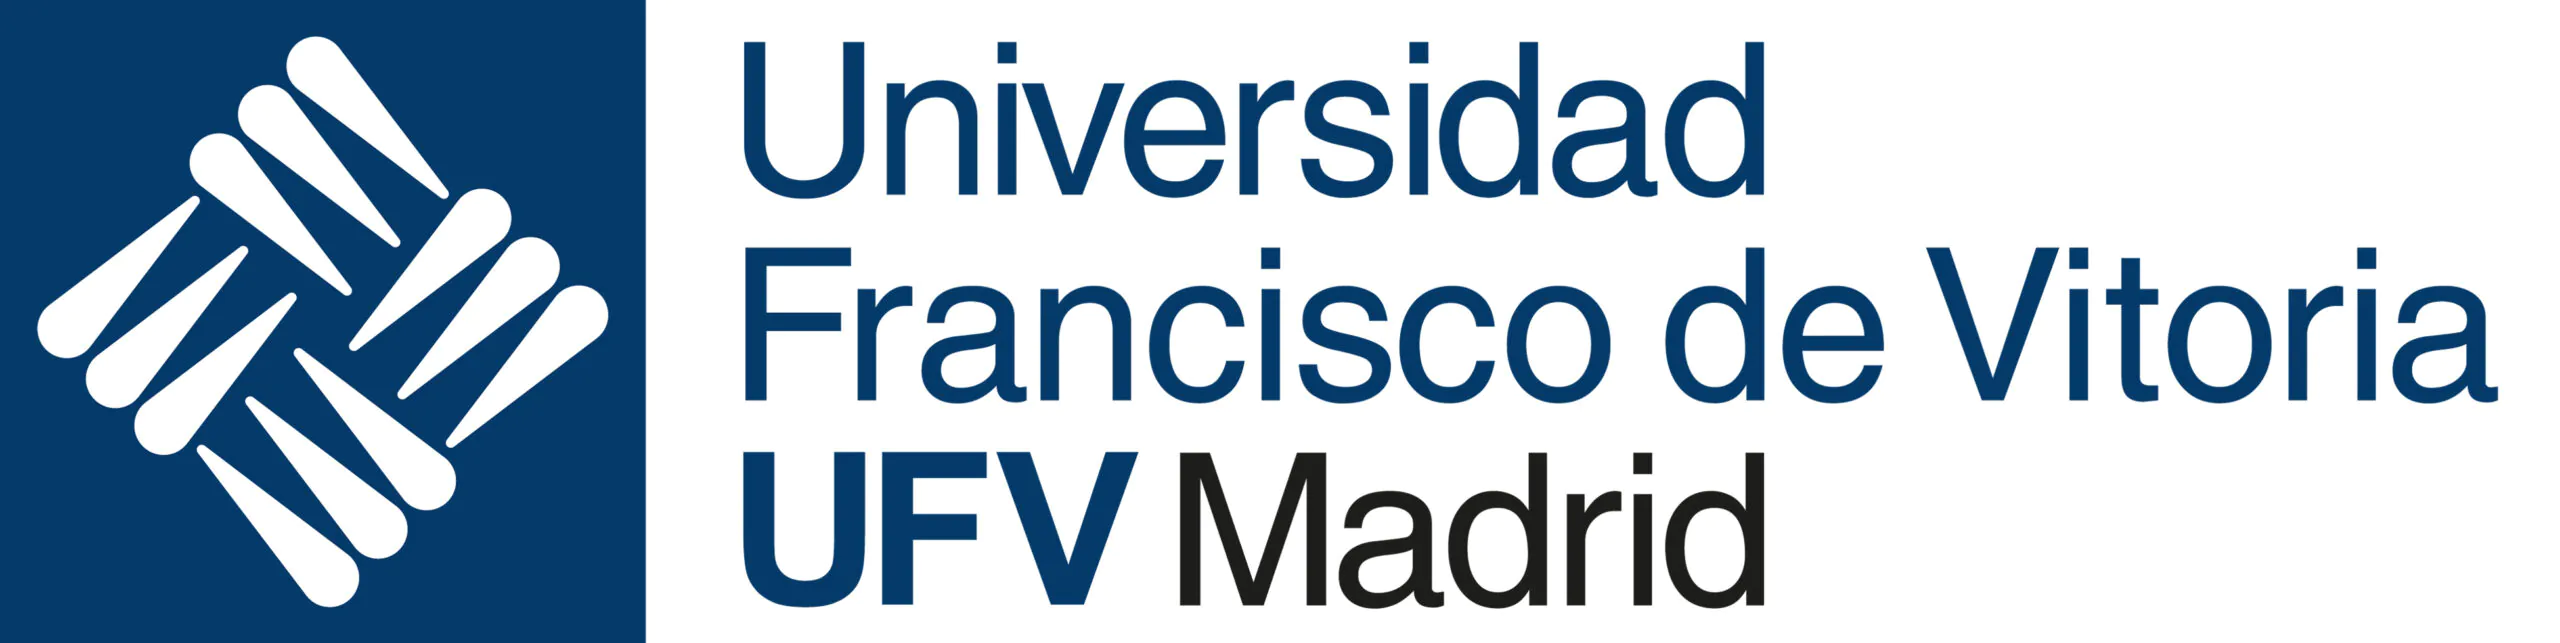

***

**<mark>Nota.-**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que las soluciones que aparecen recogidas en este notebook no muestran (en su totalidad) la respuesta que ustedes tendréis que dar en vuestras resoluciones. Simplemente se aportan los resultados principales de cada uno de los ejercicios propuestos para que podáis utilizarlos como referencias a la hora de autoevaluaros. Recordar que tenéis que completar cada uno de ellos incluyendo comentarios acerca de los resultados obtenidos describiendo con detalle cada una de las celdas tipo código paso a paso lo que estáis haciendo. </b></div>

***

### Ejercicio 1 

Considerar la información de la base de datos `airquality` de la librería $\tt datasets$, que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos años. La variable dependiente `Ozone` que es la concentración media de ozono en la atmósfera (en ppb, partes por billón) se quiere explicar a partir de la variable independiente `Temp` que nos indica la temperatura máxima diaria (en grados Fahrenheit). Se os pide responder a los siguientes apartados. 

1. Exploración inicial de la base de datos. 
2. Estimar dos o tres modelos de regresión polinómicos utilizando diferentes grados e interpretar sus resultados.
3. Compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
4. Estimar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte e interpretar sus resultados.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

Vamos a utilizar el conjunto de datos `airquality` de la libería $\tt datasets$ que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos años. Estamos interesados en explicar la concentración media de ozono en la atmósfera (en ppb, partes por billón) a partir de la temperatura máxima diaria (en grados Fahrenheit). En este caso, nuestra variable dependiente será `Ozone` y la variable independiente será `Temp`. 

In [1]:
# Cargamos la base de datos que nos interesa
data(airquality)

In [2]:
# Estructura de la base de datos 'airquality'
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [3]:
# Clases de la base de datos 'airquality'
class(airquality)

[1] "data.frame"

In [4]:
# Dimensiones de la base de datos 'airquality'
dim(airquality)

[1] 153   6

In [5]:
# Variables de la base de datos 'airquality'
names(airquality)

[1] "Ozone"   "Solar.R" "Wind"    "Temp"    "Month"   "Day"

In [6]:
# Seleccionamos las 2 variables que nos interesan
zdata=airquality[, c("Ozone", "Temp")]

In [7]:
# Visualizamos la base de datos seleccionada
head(zdata)

,Ozone,Temp
,<int>,<int>
1,41,67
2,36,72
3,12,74
4,18,62
5,NA,56
6,28,66


In [8]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)

In [9]:
# Podemos comprobar como se han eliminado 37 observaciones por no tener datos
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 153

[1] 116

In [10]:
# Visualizamos la base de datos seleccionada
head(wdata)
nrow(wdata) # comprobamos que es la base de datos correcta

,Ozone,Temp
,<int>,<int>
1,41,67
2,36,72
3,12,74
4,18,62
6,28,66
7,23,65


[1] 116

In [11]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

     Ozone             Temp      
 Min.   :  1.00   Min.   :57.00  
 1st Qu.: 18.00   1st Qu.:71.00  
 Median : 31.50   Median :79.00  
 Mean   : 42.13   Mean   :77.87  
 3rd Qu.: 63.25   3rd Qu.:85.00  
 Max.   :168.00   Max.   :97.00  

<div style="background-color:#0BF7CC"><b> Nota.- En este punto, como ya os comenté, tenéis que incluir un análisis más detallado de todos los estadísticos descriptivos que hemos visto en el Notebook 2.1 (gráficos de frecuencias, medidas de tendencia central, posición, dispersión y forma) así como interpretar los resultados obtenidos tal y como se ha indicado en las sesiones teóricas. </b></div>

<div style="background-color:#0BF7CC"><b> Nota 2.- Además, también se debería de incluir un análisis de la correlación antes de estimar ningún tipo de modelo de regresión. En este caso, nos remitimos al Lab 3.1 ya que es la misma base de datos y allí encontraréis la solución. Ustedes, tenéis que tenerlo en cuenta ya que habría que incluirlo en este apartado. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

En este caso, tenemos una sola variable explicativa `Temp` $(x)$, pero podemos ajustar potencias mayores de $x$, como $x^2$, $x^3$... y añadirlas al modelo, junto a $x$, para describir diversos tipos de curvatura en la relación entre la concentración media de ozono en la atmósfera y la temperatura máxima diaria. Veamos varias simulaciones. Recordar que siempre tenéis que estimar el modelo de regresión lineal para compararlo con los supusestos no-lineales.

In [12]:
# Estimamos el modelo lineal y obtenemos un resumen del mismo
mod_lineal = lm (Ozone ~ Temp, data=wdata)
summary(mod_lineal)


Call:
lm(formula = Ozone ~ Temp, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.729 -17.409  -0.587  11.306 118.271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -146.9955    18.2872  -8.038 9.37e-13 ***
Temp           2.4287     0.2331  10.418  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.71 on 114 degrees of freedom
Multiple R-squared:  0.4877,	Adjusted R-squared:  0.4832 
F-statistic: 108.5 on 1 and 114 DF,  p-value: < 2.2e-16


In [13]:
# Estimamos el modelo no-lineal polinómico de orden 2 y obtenemos un resumen del mismo
mod_poly2=lm(formula = Ozone ~ Temp + I(Temp^2), data = wdata)
summary(mod_poly2)


Call:
lm(formula = Ozone ~ Temp + I(Temp^2), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.619 -12.513  -2.736   9.676 123.909 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 305.48577  122.12182   2.501 0.013800 *  
Temp         -9.55060    3.20805  -2.977 0.003561 ** 
I(Temp^2)     0.07807    0.02086   3.743 0.000288 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.47 on 113 degrees of freedom
Multiple R-squared:  0.5442,	Adjusted R-squared:  0.5362 
F-statistic: 67.46 on 2 and 113 DF,  p-value: < 2.2e-16


In [14]:
# Estimamos el modelo no-lineal polinómico de orden 3 y obtenemos un resumen del mismo
mod_poly3=lm(formula = Ozone ~ Temp + I(Temp^2) + I(Temp^3), data = wdata)
summary(mod_poly3)


Call:
lm(formula = Ozone ~ Temp + I(Temp^2) + I(Temp^3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.364 -12.467  -2.192  10.117 122.636 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.260e+03  8.846e+02   1.425    0.157
Temp        -4.761e+01  3.508e+01  -1.357    0.177
I(Temp^2)    5.778e-01  4.590e-01   1.259    0.211
I(Temp^3)   -2.162e-03  1.984e-03  -1.090    0.278

Residual standard error: 22.45 on 112 degrees of freedom
Multiple R-squared:  0.549,	Adjusted R-squared:  0.5369 
F-statistic: 45.45 on 3 and 112 DF,  p-value: < 2.2e-16


**<u>Interpretación resultados (coeficientes)</u>.-** Vemos que la pendiente para el término cuadrático $(0.07807)$ es altamente significativa, indicando la existencia de una fuerte curvatura en los datos en comparación con el modelo lineal. Si tenemos en cuenta el modelo cúbico, vemos cómo los coeficientes de regresión NO son significativos, ya que los p-valores son mayores a $5\%$. Luego, rechazaríamos la hipótesis nula $H_0: \beta_k=0$ siendo $k=0,1,2,3$ correspondiendo con cada uno de los términos. Por tanto, según el criterio de significativdad de los coeficientes de regresión nos quedaríamos con el modelo cuadrático. Habría que incluir el resto de métricas para confirmar estos resultados como veremos a continuación.

<div style="background-color:#0BF7CC"><b> Nota.- Una señal que os puede ayudar a saber si las variables elevadas al cuadrado, cubo, etc. son significativas y tiene sentido que las incorporemos es el criterio del descarte por NAs. Ese valor nos indica que esa variable elevada a la potencia que sea (en este caso, 3) no aporta información para explicar nuestra variable dependiente. Este hecho tendríamos que tenerlo en cuenta a la hora de tomar una decisión final sobre el modelo elegido. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [15]:
# Calculamos los 3 criterios de selección de los modelos estimados anteriormente
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_poly2)$adj.r.squared, summary(mod_poly3)$adj.r.squared)

In [16]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_poly2)[2], extractAIC(mod_poly3)[2])

In [17]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(mod_poly2,k=log(nrow(wdata)))[2],
      extractAIC(mod_poly3,k=log(nrow(wdata)))[2])

In [18]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_poly2","mod_poly3"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|           | Coef.R2adj|      AIC|      BIC|
|:----------|----------:|--------:|--------:|
|mod_lineal |  0.4832134| 736.5126| 742.0198|
|mod_poly2  |  0.5361501| 724.9546| 733.2153|
|mod_poly3  |  0.5369181| 725.7312| 736.7456|

**<u>Interpretación resultados (métricas selección)</u>.-** ¿Con cuál nos quedaríamos? En este caso, los tres modelos salen muy parejos en cuanto a los resultados pero podemos ver como ganaríamos algo más de capacidad explicativa (mayor $R^2_{adj}$ y perderíamos algo menos de información (AIC-BIC) con el modelo no-lineal 2 (modelo cuadrático). Por tanto, según las métricas de selección de modelos, nos quedarímos con el modelo `mod_poly2` para explicar la concentración media de ozono en la atmósfera a partir de la temperatura máxima diaria. Finalmente, vamos a realizar una representación gráfica para corroborar las evidencias que hemos obtenido hasta ahora. Os dejo a ustedes el comentario sobre la gráfica.

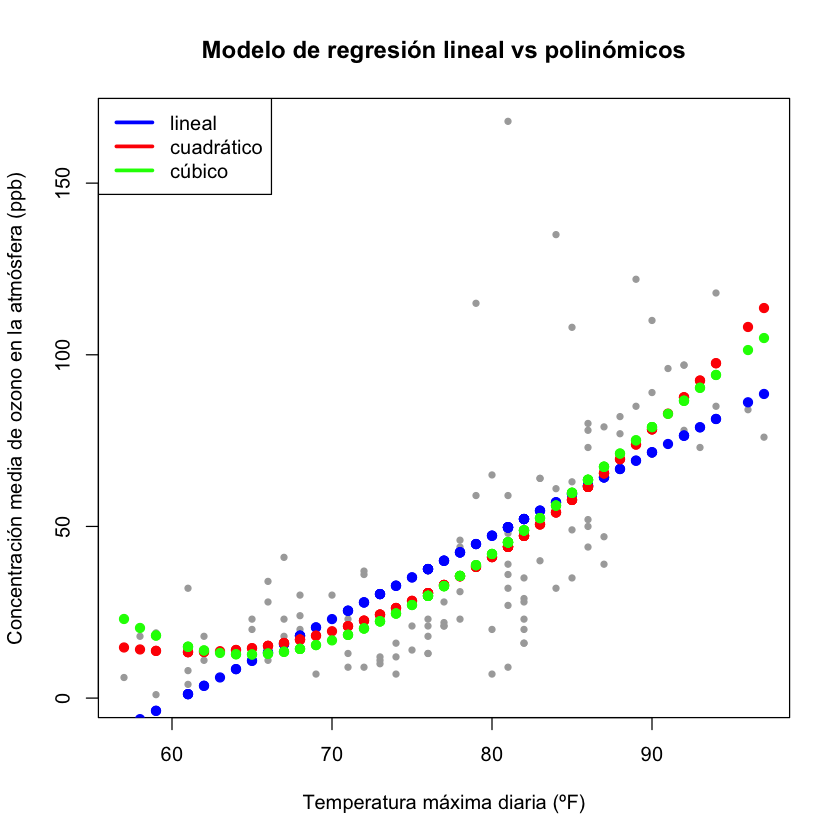

In [19]:
# Representación gráfica del modelo lineal vs cuadrático vs cúbico
plot(x = wdata$Temp, y = wdata$Ozone, pch = 20, col = "darkgrey", xlab= "Temperatura máxima diaria (ºF)", 
     ylab="Concentración media de ozono en la atmósfera (ppb)"); title("Modelo de regresión lineal vs polinómicos")
points(wdata$Temp, fitted(mod_lineal), col = 'blue', pch = 20, cex=1.5)
points(wdata$Temp, fitted(mod_poly2), col = 'red', pch = 20, cex=1.5)
points(wdata$Temp, fitted(mod_poly3), col = 'green', pch = 20, cex=1.5)
legend("topleft", legend = c("lineal", "cuadrático", "cúbico"),lwd = 3, col = c("blue","red", "green"))

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

La regresión polinómica explicada anteriormente persigue generar una única función global que describa el comportamiento de la variable dependiente `Ozone` a partir de la variable independiente `Temp` elevada a un polinomio de orden $k$. Ahora, la estrategia del método step functions consiste en dividir el rango de valores de la variable independiente `Temp` en varios subintervalos y ajustar un coeficiente de regresión lineal distinto para cada uno ellos. Luego, no realizaremos una aproximación polinómica sino "lineal a saltos". En este caso, se pretende crear un modelo formado por $3-4$ step functions considerando diferentes intervalos de temperatura y compararlo con el modelo de regresión lineal para ello seguiremos dos estrategias:

+ Escenario no. $1$: los puntos de corte en la variable independiente NO están equidistribuidos

+ Escenario no. $2$: los puntos de corte en la variable independiente SI están equidistribuidos

In [20]:
# Estimamos el modelo de regresión step functions con puntos de corte sin concretar (Escenario 1)
modelo_step_fun1 = lm(Ozone ~ cut(Temp, 3), data = wdata)
summary(modelo_step_fun1)


Call:
lm(formula = Ozone ~ cut(Temp, 3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.118 -12.835  -2.776   8.310 135.855 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               18.407      4.539   4.056 9.22e-05 ***
cut(Temp, 3)(70.3,83.7]   13.738      5.542   2.479   0.0146 *  
cut(Temp, 3)(83.7,97]     58.710      6.079   9.658  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.58 on 113 degrees of freedom
Multiple R-squared:  0.4978,	Adjusted R-squared:  0.4889 
F-statistic: 56.01 on 2 and 113 DF,  p-value: < 2.2e-16


In [21]:
# Para visualizar los 3 intervalos definidos automáticamente
modelo_step_fun1$model$`cut(Temp, 3)`

[1] (57,70.3]   (70.3,83.7] (70.3,83.7] (57,70.3]   (57,70.3]   (57,70.3]  
  [7] (57,70.3]   (57,70.3]   (70.3,83.7] (57,70.3]   (57,70.3]   (57,70.3]  
 [13] (57,70.3]   (57,70.3]   (57,70.3]   (57,70.3]   (57,70.3]   (57,70.3]  
 [19] (57,70.3]   (70.3,83.7] (57,70.3]   (57,70.3]   (57,70.3]   (70.3,83.7]
 [25] (70.3,83.7] (70.3,83.7] (70.3,83.7] (83.7,97]   (83.7,97]   (70.3,83.7]
 [31] (70.3,83.7] (70.3,83.7] (57,70.3]   (70.3,83.7] (70.3,83.7] (83.7,97]  
 [37] (83.7,97]   (70.3,83.7] (70.3,83.7] (70.3,83.7] (83.7,97]   (83.7,97]  
 [43] (83.7,97]   (83.7,97]   (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7]
 [49] (70.3,83.7] (83.7,97]   (83.7,97]   (83.7,97]   (70.3,83.7] (83.7,97]  
 [55] (83.7,97]   (70.3,83.7] (83.7,97]   (83.7,97]   (83.7,97]   (70.3,83.7]
 [61] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (83.7,97]   (83.7,97]  
 [67] (83.7,97]   (83.7,97]   (83.7,97]   (83.7,97]   (83.7,97]   (70.3,83.7]
 [73] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7]
 [79] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (83.7,97]   (83.7,97]  
 [85] (83.7,97]   (83.7,97]   (83.7,97]   (83.7,97]   (83.7,97]   (83.7,97]  
 [91] (83.7,97]   (83.7,97]   (83.7,97]   (70.3,83.7] (70.3,83.7] (70.3,83.7]
 [97] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7] (70.3,83.7]
[103] (70.3,83.7] (57,70.3]   (70.3,83.7] (57,70.3]   (70.3,83.7] (57,70.3]  
[109] (70.3,83.7] (70.3,83.7] (57,70.3]   (57,70.3]   (57,70.3]   (70.3,83.7]
[115] (70.3,83.7] (57,70.3]  
Levels: (57,70.3] (70.3,83.7] (83.7,97]

**<u>Interpretación resultados</u>.-** En el summary del modelo obtenido NO aparece el grupo $(57,70.3]$, lo que significa que este es el grupo de referencia. El intercept ($18.407$) se interpreta como la concentración media de ozono en la atmósfera (en ppb, partes por billón) para una temperatura máxima diaria (en grados Fahrenheit) comprendida entre $(57,70.3]$. Como sabemos, el coeficiente de regresión estimado de cada uno de los otros dos intervalos de temperaturas indica el incremento promedio de la concentración de ozono en la atmósfera con respecto al intervalo de temperatura que le precede. Es decir, por ejemplo, para temperaturas máximas diarias comprendidas entre $(70.3,83.7]$ ºF, cuya pendiente es igual a $13.738$, tendrán ese incremento en ppb de la concentración de ozono con respecto al intervalo de temperaturas menor $(57,70.3]$.

<div style="background-color:#0BF7CC"><b> Nota.- Cuando la función $\tt lm()$ reconoce que se está empleando $\tt cut()$ genera automáticamente las variables dummy necesarias para proceder con la regresión por mínimos cuadrados igual que hemos hecho en los modelos de regresión lineal simple y múltiple para obtener una estimación de los coeficientes de regresión, valores ajustados, residuos, etc. </b></div>

Ahora vamos a estimar el modelo de step functions del Escenario no. $2$ en el que nosotros elegimos los puntos de corte. Dos criterios para seleccionar los valores de los knots serían, por un lado, a partir del histograma podemos hacer nosotros los intervalos en función de la frecuencia observada y por otro, a través de las medidas de posición seleccionando los cuartiles para tener intervalos equidistribuidos. 

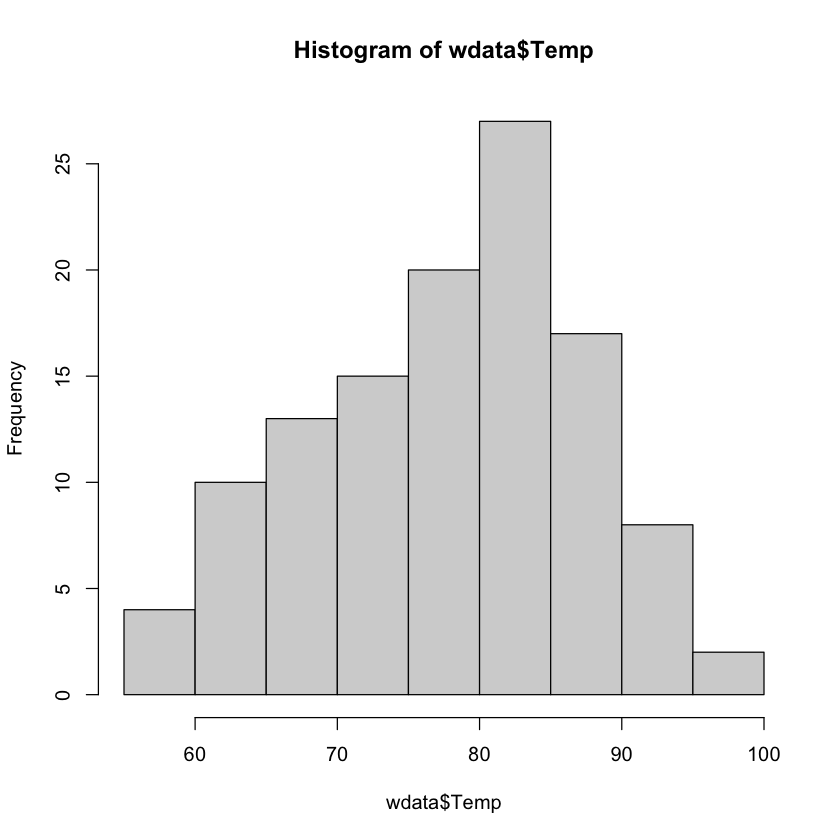

In [22]:
# Obtenemos el histograma de la variable independiente (aquí no sabemos los % equidistribuidos)
hist(wdata$Temp)

In [23]:
# Obtenemos Q1, Q2 y Q3 de la variable independiente
quantile(wdata$Temp, c(.25,.5,.75))

25% 50% 75% 
 71  79  85

In [24]:
# Estimamos el modelo de regresión step functions con puntos de corte = cuartiles (Escenario 2)
modelo_step_fun2 = lm(Ozone ~ cut(Temp, c(min(wdata$Temp),71,79,85,max(wdata$Temp))), data = wdata)
summary(modelo_step_fun2)


Call:
lm(formula = Ozone ~ cut(Temp, c(min(wdata$Temp), 71, 79, 85, 
    max(wdata$Temp))), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.233 -12.720  -3.222   9.648 120.767 

Coefficients:
                                                                  Estimate
(Intercept)                                                         18.483
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(71,79]    8.724
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(79,85]   28.751
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(85,97]   60.739
                                                                  Std. Error
(Intercept)                                                            4.432
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(71,79]      6.268
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(79,85]      6.216
cut(Temp, c(min(wdata$Temp), 71, 79, 85, max(wdata$Temp)))(85,97]      6.383
                        

**<u>Interpretación resultados (coeficientes)</u>.-** La interpretación de los coeficientes es análoga a la comentada anteriormente pero cambiando los intervalos de temperatura, siendo ahora equidistribuidos. Como podemos observar, en lugar de tener una única beta para todas las temperaturas, estamos obteniendo diferentes betas para cada uno de los $4$ grupos de temperaturas considerados. En ambos casos, tanto en el modelo `modelo_step_fun1` como en `modelo_step_fun2`, los coeficientes de regresión son significativos para cada uno de los intervalos considerados en cada caso ya que los p-valores son menores que el nivel de significación igual a $5\%$. Por tanto, según el criterio de significativdad de los coeficientes de regresión no nos podríamos decantar por un modelo de step functions equidistribuido o no. Habría que incluir el resto de métricas para poder seleccionar entre ellos como veremos a continuación.

### Ejercicio 2

Utilizando la base de datos `airquality` de la librería $\tt datasets$, que consiste en $154$ medidas (de $6$ variables) de calidad del aire en Nueva York en los últimos años. Considerando la variable dependiente `Ozone` en función de la variable independiente `Temp`, responder a las siguientes cuestiones:

1. Comparar gráficamente los modelos de regresión step functions estimados anteriormente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
2. Estimar dos o tres modelos de regresión splines polinómicos utilizando diferentes grados y puntos de corte e interpretar sus resultados. 
3. Compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
4. Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores teniendo en cuenta también el modelo de regresión lineal simple.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [25]:
# Calculamos los 3 criterios de selección de los modelos estimados anteriormente
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(modelo_step_fun1)$adj.r.squared, 
           summary(modelo_step_fun2)$adj.r.squared)

In [26]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(modelo_step_fun1)[2], extractAIC(modelo_step_fun2)[2])

In [27]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(modelo_step_fun1,k=log(nrow(wdata)))[2],
      extractAIC(modelo_step_fun2,k=log(nrow(wdata)))[2])

In [28]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","modelo_step_fun1","modelo_step_fun2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|                 | Coef.R2adj|      AIC|      BIC|
|:----------------|----------:|--------:|--------:|
|mod_lineal       |  0.4832134| 736.5126| 742.0198|
|modelo_step_fun1 |  0.4889274| 736.2008| 744.4616|
|modelo_step_fun2 |  0.4755313| 733.6116| 744.6259|

**<u>Interpretación resultados (métricas selección)</u>.-** ¿Con cuál nos quedaríamos? En este caso, vemos que obtenemos resultados similares pero podríamos descartar el modelo step functions equidistribuido `modelo_step_fun2` ya que presenta algo de menor explicabilidad que los otros dos. En este caso, vemos como prácticamente obtendríamos casi un comportamiento similar con respecto al coeficiente de deteerminación ajustado y los criterios de información para el caso de los modelos `mod_lineal` y `modelo_step_fun1`. Por tanto, según las métricas de selección de modelos, entre los modelos no-lineales, nos quedaríamos con el modelo step functions que NO es equidistribuido para explicar la concentración media de ozono en la atmósfera a partir de la temperatura máxima diaria. Finalmente, vamos a realizar una representación gráfica para corroborar las evidencias que hemos obtenido hasta ahora. Os dejo a ustedes el comentario sobre la gráfica.

In [29]:
# Interpolación de puntos dentro del rango de la variable independiente (modelo_step_fun1 y 2)
limites = range(wdata$Temp)
nuevos_puntos = seq(from = limites[1], to = limites[2], by = 1)
nuevos_puntos = data.frame(Temp = nuevos_puntos)
nuevos_ajustes1 = predict(modelo_step_fun1, newdata = nuevos_puntos, se.fit = TRUE, level = 0.95)
nuevos_ajustes2 = predict(modelo_step_fun2, newdata = nuevos_puntos, se.fit = TRUE, level = 0.95)

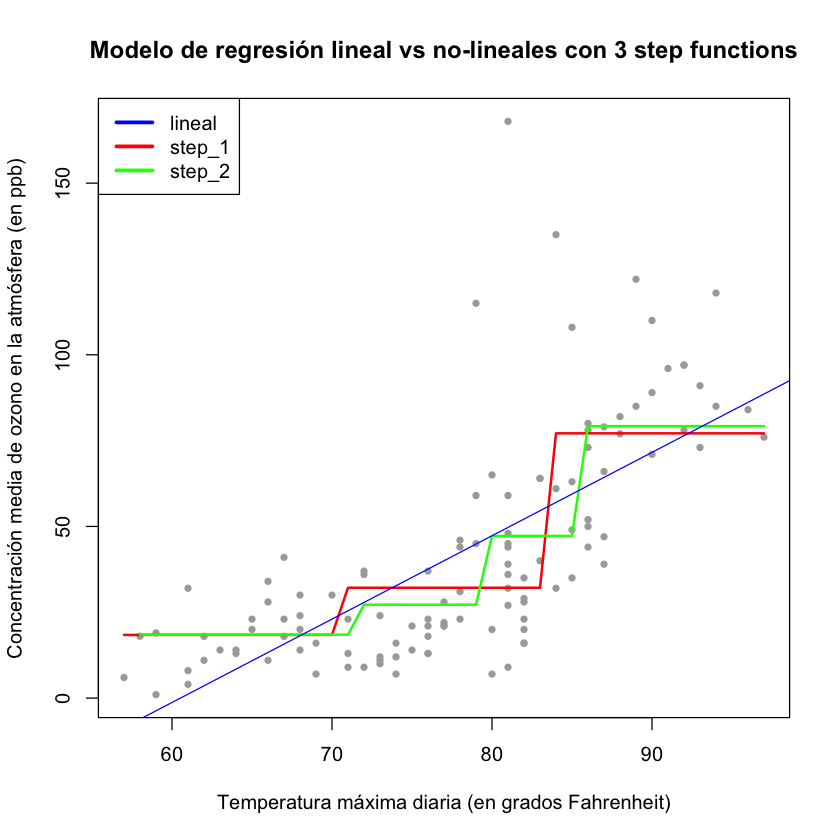

In [30]:
# Representación gráfica del modelo lineal vs modelos step functions
plot(x = wdata$Temp, y = wdata$Ozone, pch = 20, col = "darkgrey", xlab= "Temperatura máxima diaria (en grados Fahrenheit)", 
     ylab="Concentración media de ozono en la atmósfera (en ppb)"); title("Modelo de regresión lineal vs no-lineales con 3 step functions")
lines(x = nuevos_puntos$Temp, nuevos_ajustes1$fit, col = "red", lwd = 2)
lines(x = nuevos_puntos$Temp, nuevos_ajustes2$fit, col = "green", lwd = 2)
abline(mod_lineal,col="blue")
legend("topleft", legend = c("lineal", "step_1", "step_2"),lwd = 3, col = c("blue","red", "green"))

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Ahora, vamos a estimar los modelos splines polinómicos que, como sabemos, se tratan de una combinación directa de la regresión polinómica y de step functions. Los splines ofrecen una forma útil de ajustar un modelo polinómico cuando los datos se comportan en forma distinta en diferentes partes del rango de la/s variable/s independiente/s. En lugar de ajustar un polinomio de grado alto a todo el rango de la variable independiente `Temp`, como hemos hecho en el apartado no. $1$, este se divide en subintervalos y en cada uno de ellos se ajusta un polinomio de menor grado como veremos a continuación. Para ello, vamos a considerar las mismas dos estrategias que antes utilizando un polinomio cuadrático ya que fue el que mejor resultado obtuvimos anteriormente:

+ Escenario no. $1$: los puntos de corte en la variable independiente NO están equidistribuidos

+ Escenario no. $2$: los puntos de corte en la variable independiente SI están equidistribuidos

In [31]:
# Cargamos la librería splines
require(splines) 

Loading required package: splines



In [32]:
# Estimamos el modelo de regresión spline polinómico con 3 knots NO equidistribuidos (Escenario 1)
# Utilizamos los mismos puntos de corte que en el apartado anterior para el primer caso
mod_spline1 = lm(Ozone ~ bs(Temp, knots=c(57,70.3,83.7), degree=2), data = wdata)
summary(mod_spline1)


Call:
lm(formula = Ozone ~ bs(Temp, knots = c(57, 70.3, 83.7), degree = 2), 
    data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.830 -10.588  -3.338   7.958 125.902 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                        88.966     12.890   6.902
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)1  -81.595     17.270  -4.725
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)2  -65.358     16.788  -3.893
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)3  -73.047     12.702  -5.751
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)4    8.273     18.421   0.449
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)5       NA         NA      NA
                                                 Pr(>|t|)    
(Intercept)                                      3.35e-10 ***
bs(Temp, knots = c(57, 70.3, 83.7), degree = 2)1 6.80e-06 ***
bs(Temp, knots = c(57, 70.3, 

**<u>Interpretación resultados</u>.-** El modelo obtenido tiene tres puntos de corte (knot) en los valores $57$, $70.3$ y $83.7$ ºF de la variable independiente temperatura máxima promedio, y se describe a través de la siguiente función continua del modelo de regresión no-lineal spline cuadrático estimado:

\begin{align*}
Ozone_{i}=88.966-81.595*Temp_{i}-65.358*Temp^2_{i}-73.047*(Temp_{i}-57)^2_{i}+8.273*(Temp_{i}-70.3)^2+0*(Temp_{i}-83.7)^2_{i}+\epsilon_{i} 
\end{align*}

Como podemos observar, en lugar de tener tres funciones polinómicas para cada uno de los intervalos definidos a partir de los puntos de corte, estamos obteniendo una única función continua. Modelizamos el ajuste del modelo de regresión no-lineal spline cuadrático a cada uno de los intervalos de temperatura considerados a través de los coeficientes de regresión $\beta_3$, $\beta_4$ y $\beta_5$. Siendo significativos $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$. Veamos ahora el caso de los puntos de corte equidistribuidos.

In [33]:
# bs(x, df=5, knots=sin determinar, degree=2) --> 3 = 5 - 2 

# El no. de knots = 3 (sin determinarlos nosotros pero equidistribuidos)
# Los grados de libertad = 5 (parámetros estimados)
# Los grados del polinomio son degree = 2 (polinomio cuadrático)

In [34]:
# Estimamos el modelo de regresión spline polinómico con 3 knots equidistribuidos (Escenario 2)
mod_spline2 = lm(Ozone ~ bs(Temp, df=5, degree=2), data = wdata)
summary(mod_spline2)


Call:
lm(formula = Ozone ~ bs(Temp, df = 5, degree = 2), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.971 -10.886  -3.348   7.965 125.598 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      7.733     12.372   0.625  0.53325    
bs(Temp, df = 5, degree = 2)1   15.940     20.155   0.791  0.43071    
bs(Temp, df = 5, degree = 2)2    9.994     12.683   0.788  0.43238    
bs(Temp, df = 5, degree = 2)3   38.046     14.301   2.660  0.00897 ** 
bs(Temp, df = 5, degree = 2)4   91.138     16.223   5.618 1.47e-07 ***
bs(Temp, df = 5, degree = 2)5   79.616     19.027   4.184 5.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.02 on 110 degrees of freedom
Multiple R-squared:  0.5739,	Adjusted R-squared:  0.5545 
F-statistic: 29.63 on 5 and 110 DF,  p-value: < 2.2e-16


In [35]:
# Obtenemos los puntos de corte elegidos según criterio equitativo
attr(bs(wdata$Temp, df = 5, degree = 2), "knots")

25% 50% 75% 
 71  79  85

**<u>Interpretación resultados (coeficientes)</u>.-** Los tres puntos de corte o knots elegidos por el modelo de manera automática en función del criterio de equidad haciendo uso de los cuantiles han sido: $71$, $79$ y $85$ ºF. En cada grupo se encuentran el mismo porcentaje ($25\%$) de los de los mismos. La interpretación de los coeficientes es similar a la comentada anteriormente pero cambiando los intervalos de temperatura, siendo ahora equidistribuidos. Como podemos observar, en lugar de tener una única beta para todas las temperaturas, estamos obteniendo diferentes betas para cada uno de los $3$ grupos de temperaturas considerados y, además, a diferencia de los modelos step functions, el ajuste es polinómico dentro de cada intervalo. Según el criterio de significativdad de los coeficientes de regresión nos decantaríamos por el modelo spline polinómico equidistribuido `mod_spline2` ya que dichos coeficientes son significativos para cada uno de los intervalos considerados. En el caso del modelo `mod_spline1` solamente ocurría para el primero de los intervalos considerados. Como siempre, habría que incluir el resto de métricas para poder seleccionar entre ellos como veremos a continuación.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [36]:
# Calculamos los 3 criterios de selección de los modelos estimados anteriormente
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_spline1)$adj.r.squared, 
           summary(mod_spline2)$adj.r.squared)

In [37]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_spline1)[2], extractAIC(mod_spline2)[2])

In [38]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(mod_spline1,k=log(nrow(wdata)))[2],
      extractAIC(mod_spline2,k=log(nrow(wdata)))[2])

In [39]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_spline1","mod_spline2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|            | Coef.R2adj|      AIC|      BIC|
|:-----------|----------:|--------:|--------:|
|mod_lineal  |  0.4832134| 736.5126| 742.0198|
|mod_spline1 |  0.5575214| 721.4115| 735.1794|
|mod_spline2 |  0.5545201| 723.1459| 739.6674|

**<u>Interpretación resultados (métricas selección)</u>.-** ¿Con cuál nos quedaríamos? En este caso, descartaríamos el modelo lineal y nos quedaríamos con un modelo no-lineal spline polinómico ya que aumentamos la capacidad explicativa y perdemos menos información. Entre ellos, vemos como prácticamente obtendríamos casi un comportamiento similar con respecto a los tres indicadores. Por tanto, según las métricas de selección de modelos, entre los modelos no-lineales, no nos podríamos decantar por ninguno de los dos aunque tendríamos que tener en cuenta en la decisión final que en el modelo `mod_spline2` nos han salido los coeficientes significativos en todos los intervalos a diferencia del modelo `mod_spline1`. Finalmente, vamos a realizar una representación gráfica para corroborar las evidencias que hemos obtenido hasta ahora. Os dejo a ustedes el comentario sobre la gráfica.

In [40]:
# Interpolación dentro del rango de valores variable independiente (mod_splines 1 y 2)
limites = range(wdata$Temp)
nuevos_puntos = seq(from = limites[1], to = limites[2], by = 1)
nuevos_puntos = data.frame(Temp = nuevos_puntos)
nuevos_ajustes1 = predict(mod_spline1, newdata = nuevos_puntos, se.fit = TRUE,level = 0.95)
nuevos_ajustes2 = predict(mod_spline2, newdata = nuevos_puntos, se.fit = TRUE,level = 0.95)

Warning message in predict.lm(mod_spline1, newdata = nuevos_puntos, se.fit = TRUE, :
“prediction from a rank-deficient fit may be misleading”


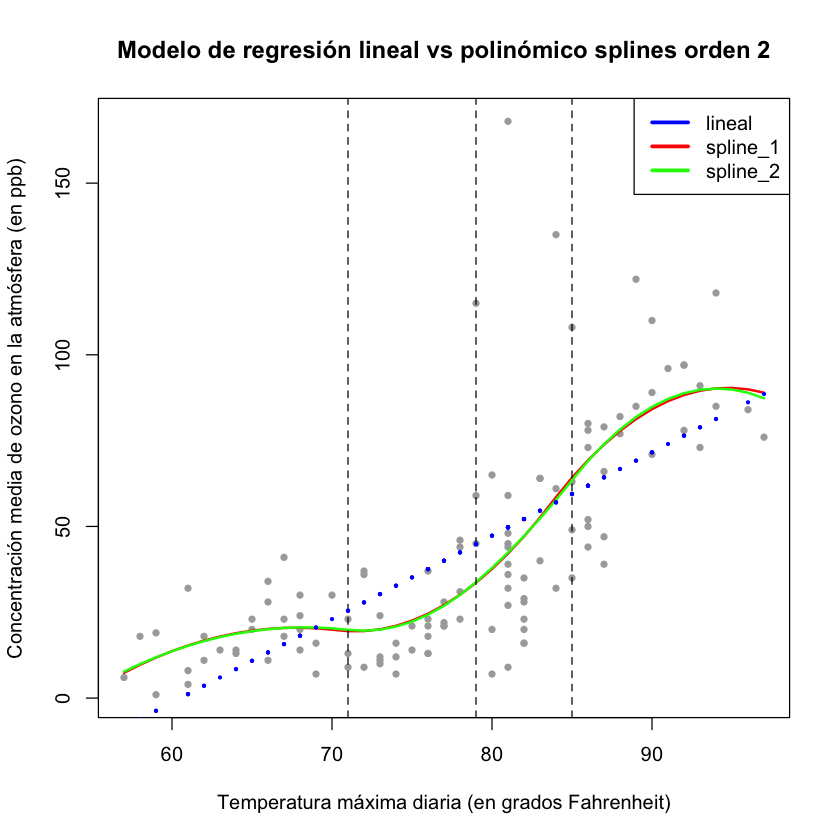

In [41]:
# Representación gráfica del modelo polinómico vs modelos splines polinómicos
plot(x = wdata$Temp, y = wdata$Ozone, pch = 20, col = "darkgrey",xlab= "Temperatura máxima diaria (en grados Fahrenheit)", 
     ylab="Concentración media de ozono en la atmósfera (en ppb)")
title("Modelo de regresión lineal vs polinómico splines orden 2")
lines(x = nuevos_puntos$Temp, nuevos_ajustes1$fit, col = "red", lwd = 2)
lines(x = nuevos_puntos$Temp, nuevos_ajustes2$fit, col = "green", lwd = 2)
abline(v=c(71,79,85), lty = 2)
points(wdata$Temp, fitted(mod_lineal), col = 'blue', pch = 20, cex=.5)
legend("topright", legend = c("lineal", "spline_1", "spline_2"),lwd = 3, col = c("blue","red", "green"))

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Por último, vamos a comparar las métricas de todos los modelos estimados en los apartados anteriores para ver con cuál de ellos obtenemos un mejor ajuste a la hora de querer explicar la concentración media de ozono en la atmósfera a partir de la temperatura máxima diaria. Los modelos considerados en este ejercicio son los siguientes:

* `mod_lineal`: modelo de regresión lineal
* `mod_poly2`: modelo de regresión no-lineal polinómico orden 2 (cuadrático)
* `mod_poly3`: modelo de regresión no-lineal polinómico orden 3 (cúbico)
* `mod_step1`: modelo de regresión no-lineal step function no equidistribuido
* `mod_step2`: modelo de regresión no-lineal step function equidistribuido
* `mod_spline1`: modelo de regresión no-lineal spline polinómico orden 2 (no equidistribuido)
* `mod_spline2`: modelo de regresión no-lineal spline polinómico orden 2 (equidistribuido)

In [42]:
# Calculamos los 3 criterios de selección de los modelos estimados previamente
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_poly2)$adj.r.squared, summary(mod_poly3)$adj.r.squared, 
           summary(modelo_step_fun1)$adj.r.squared, summary(modelo_step_fun2)$adj.r.squared, summary(mod_spline1)$adj.r.squared,
           summary(mod_spline2)$adj.r.squared)

In [43]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_poly2)[2], extractAIC(mod_poly3)[2], 
            extractAIC(modelo_step_fun1)[2], extractAIC(modelo_step_fun2)[2], extractAIC(mod_spline1)[2], 
            extractAIC(mod_spline2)[2])

In [44]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2], extractAIC(mod_poly2,k=log(nrow(wdata)))[2],
            extractAIC(mod_poly3,k=log(nrow(wdata)))[2], extractAIC(modelo_step_fun1,k=log(nrow(wdata)))[2],
            extractAIC(modelo_step_fun2,k=log(nrow(wdata)))[2], extractAIC(mod_spline1,k=log(nrow(wdata)))[2],
            extractAIC(mod_spline2,k=log(nrow(wdata)))[2])

In [45]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_poly2","mod_poly3",
                                                                    "modelo_step_fun1","modelo_step_fun2",
                                                                    "mod_spline1","mod_spline2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|                 | Coef.R2adj|      AIC|      BIC|
|:----------------|----------:|--------:|--------:|
|mod_lineal       |  0.4832134| 736.5126| 742.0198|
|mod_poly2        |  0.5361501| 724.9546| 733.2153|
|mod_poly3        |  0.5369181| 725.7312| 736.7456|
|modelo_step_fun1 |  0.4889274| 736.2008| 744.4616|
|modelo_step_fun2 |  0.4755313| 733.6116| 744.6259|
|mod_spline1      |  0.5575214| 721.4115| 735.1794|
|mod_spline2      |  0.5545201| 723.1459| 739.6674|

**<mark>Conclusión final selección modelo</marck>.-** A la vista de los resultados, y si los agrupamos por familia de modelos, podríamos afirmar que los de mejor ajuste sos los modelos spline polinómicos, seguidos de los modelos polinómicos, luego irían los modelos step functions igualados al modelo puramente lineal. Luego, el mejor modelo que hemos obtenido, según el criterio de las métricas de ajuste, sería el `mod_spline1` ya que es el que tiene una mayor capacidad explicativa y menor pérdida de información, seguido del modelo `mod_spline2`. Como hemos visto, en el análisis de la significatividad de los coeficientes de regresión, en el modelo `mod_spline2` nos han salido los coeficientes significativos en todos los intervalos a diferencia del modelo `mod_spline1`. Por tanto, nos quedaremos con ese modelo para realizar las tareas de diagnosis.

Finalmente, como siempre, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.

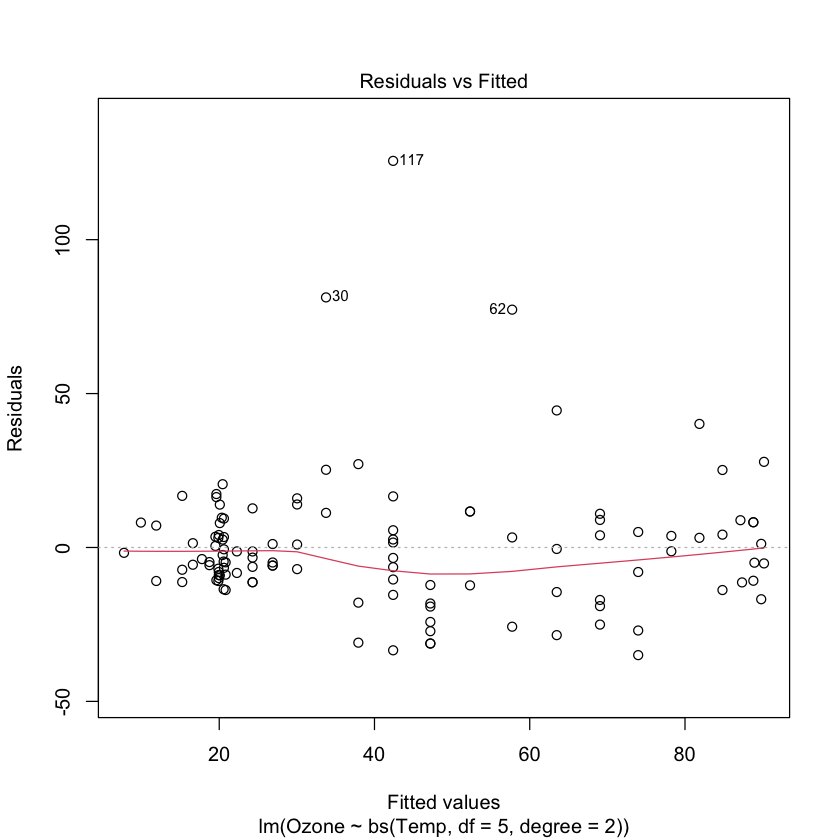

In [46]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_spline2, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

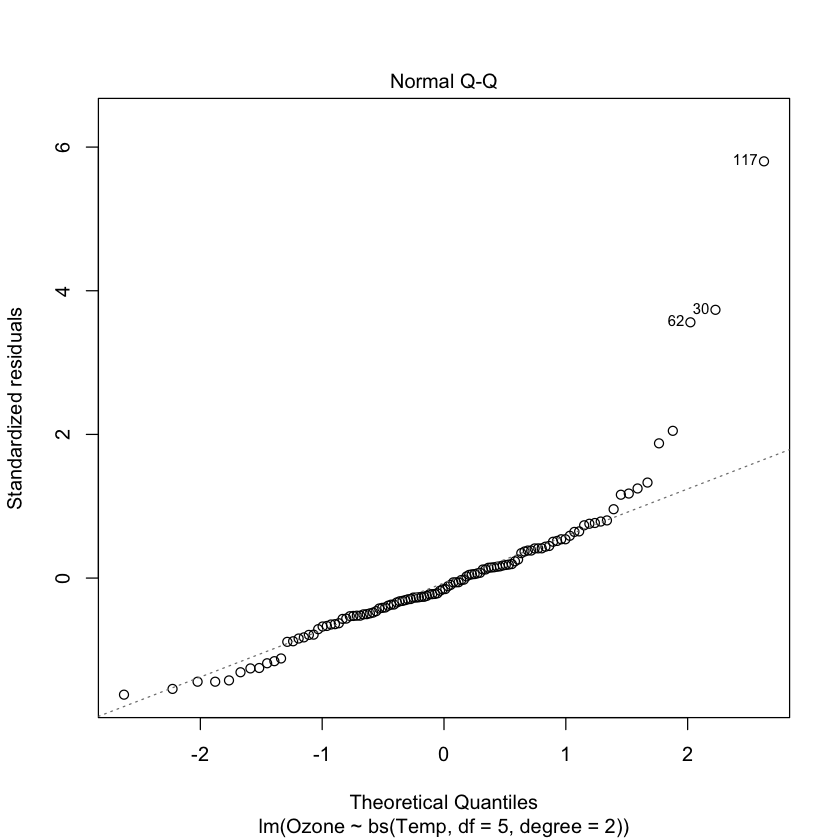

In [47]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_spline2, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole sería una evidencia negativa de que los residuos no siguen una distribución normal. En este caso, la mayoría de puntos están superpuestos a la línea recta.

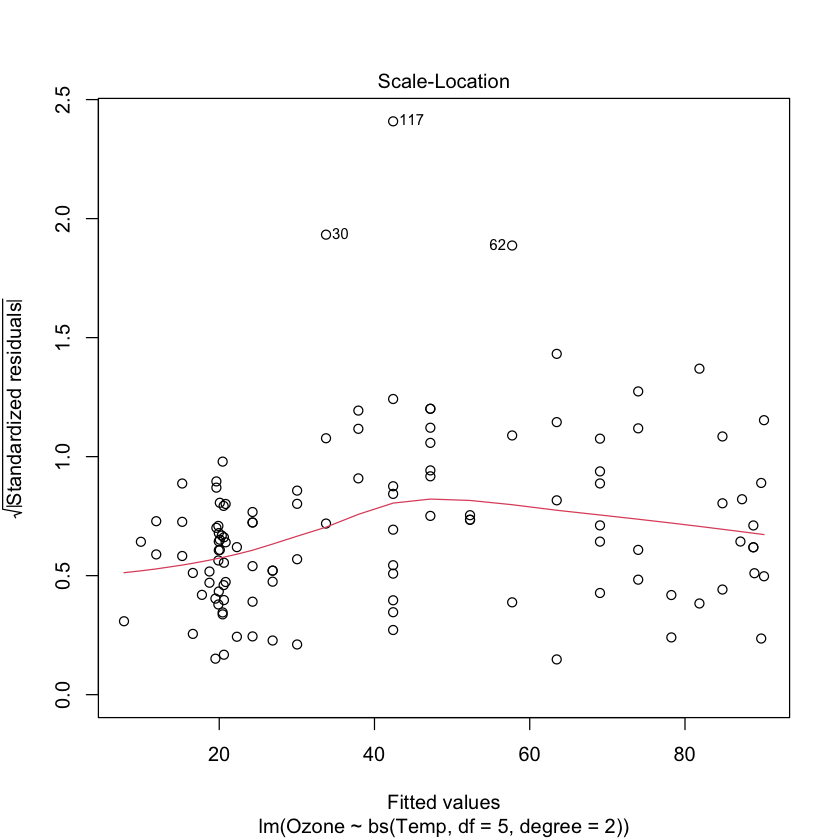

In [48]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_spline2, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, sería una evidencia negativa. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. Podemos observar, que si bien la "amplitud del tubo" es algo amplia, podríamos decir que la variabilidad de los errores permanencen constantes sin un patrón puramente aleatorio o en forma de curva pronunciada. Luego, podríamos afirmar que existe una `evidencia POSITIVA`.

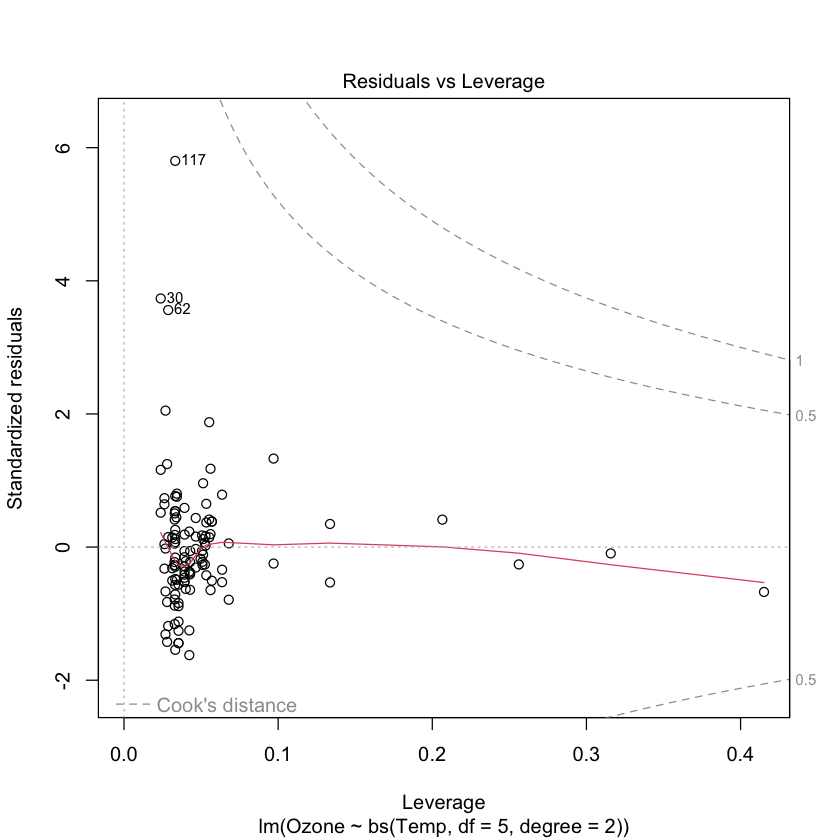

In [49]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_spline2, which=5)

**<u>Interpretación resultados</u>.-** La última gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo: 

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existen varios puntos que incumplen dicha condición. Luego, sería una `evidencia NEGATIVA`. 


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha.

**<mark>Conclusión final diagnosis</mark>.-** En este apartado hemos obtenido cuatro evidencias positivas y dos evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos SI podemos afirmar que el mejor modelo seleccionado `mod_spline2` es BUENO para explicar la concentración media de ozono en la atmósfera a partir de la temperatura máxima diaria.

### Ejercicio 3

El dataframe `Boston` de la librería $\tt MASS$ contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por $13$ variables que indican las características de la misma, así como por la variable `medv` que representa una estimación del valor de la propiedad en miles de dólares. Considerando la variable dependiente `medv` en función de la variable independiente `crim` que representa la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas. Se os pide responder a los siguientes apartados. 

1. Exploración inicial de la base de datos. 
2. Estimar dos o tres modelos de regresión polinómicos utilizando diferentes grados e interpretar sus resultados.
3. Compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
4. Estimar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte e interpretar sus resultados.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este caso, solo mostraré los resultados para que podáis verificar si lo habéis realizado correctamente o no. Podéis utilizar como referencia para comentar cada uno de los puntos las interpretaciones incluidas en el problema no. $1$. Al utilizar otra base de datos y diferentes variables, los resultados y por tanto, las interpretaciones, serán diferentes pero la estructura del ejercicio es la misma (paso a paso). </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

Vamos a utilizar el conjunto de datos ampliamente conocido `Boston` de la libería $\tt MASS$ que contiene información de propiedades inmobiliarias de la ciudad de Boston. Estamos interesados en explicar el valor de las propiedades (en miles de dólares) a partir de la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas. En este caso, nuestra variable dependiente será `medv` y la variable independiente será `crim`. 

In [50]:
# Cargamos la librería (no hacer caso al mensaje Warning, se ha instalado correctamente la librería)
require(MASS)

Loading required package: MASS



In [51]:
# Cargamos la base de datos que nos interesa
data(Boston)

In [52]:
# Estructura de la base de datos 'Boston'
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [53]:
# Clases de la base de datos 'Boston'
class(Boston)

[1] "data.frame"

In [54]:
# Dimensiones de la base de datos 'Boston'
dim(Boston)

[1] 506  14

In [55]:
# Variables de la base de datos 'Boston'
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [56]:
# Seleccionamos las 2 variables que nos interesan
zdata=Boston[, c("medv", "crim")]

In [57]:
# Visualizamos la base de datos seleccionada
head(zdata)

,medv,crim
,<dbl>,<dbl>
1,24.0,0.00632
2,21.6,0.02731
3,34.7,0.02729
4,33.4,0.03237
5,36.2,0.06905
6,28.7,0.02985


In [58]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)

In [59]:
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 506

[1] 506

In [60]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD zdata o wdata indistintamente)
head(wdata)

,medv,crim
,<dbl>,<dbl>
1,24.0,0.00632
2,21.6,0.02731
3,34.7,0.02729
4,33.4,0.03237
5,36.2,0.06905
6,28.7,0.02985


In [61]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

      medv            crim         
 Min.   : 5.00   Min.   : 0.00632  
 1st Qu.:17.02   1st Qu.: 0.08205  
 Median :21.20   Median : 0.25651  
 Mean   :22.53   Mean   : 3.61352  
 3rd Qu.:25.00   3rd Qu.: 3.67708  
 Max.   :50.00   Max.   :88.97620  

<div style="background-color:#0BF7CC"><b> Nota.- Incluir un análisis más detallado de todos los estadísticos descriptivos e iterpretar los resultados obtenidos tal y como se ha comentado en multitud de ocasiones, por favor. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

En este caso, tenemos la variable explicativa `crim`, tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas, pero podemos ajustar potencias mayores de $x$, como $x^2$, $x^3$, $x^4$... y añadirlas al modelo, junto a $x$, para describir diversos tipos de curvatura como vimos en el primer ejercicio. Recordar que siempre tenéis que estimar el modelo de regresión lineal para compararlo con los supusestos no-lineales.

In [62]:
# Estimamos el modelo lineal y obtenemos un resumen del mismo
mod_lineal = lm (medv ~ crim, data=wdata)
summary(mod_lineal)


Call:
lm(formula = medv ~ crim, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


In [63]:
# Estimamos el modelo no-lineal polinómico de orden 2 y obtenemos un resumen del mismo
mod_poly2=lm(formula = medv ~ crim + I(crim^2), data = wdata)
summary(mod_poly2)


Call:
lm(formula = medv ~ crim + I(crim^2), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.768  -5.070  -2.044   2.863  32.405 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.928114   0.421132  59.193  < 2e-16 ***
crim        -0.876141   0.086279 -10.155  < 2e-16 ***
I(crim^2)    0.008868   0.001446   6.133 1.74e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.191 on 503 degrees of freedom
Multiple R-squared:  0.2099,	Adjusted R-squared:  0.2067 
F-statistic:  66.8 on 2 and 503 DF,  p-value: < 2.2e-16


In [64]:
# Estimamos el modelo no-lineal polinómico de orden 3 y obtenemos un resumen del mismo
mod_poly3=lm(formula = medv ~ crim + I(crim^2) + I(crim^3), data = wdata)
summary(mod_poly3)


Call:
lm(formula = medv ~ crim + I(crim^2) + I(crim^3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.983  -4.975  -1.940   2.881  33.391 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.519e+01  4.355e-01  57.846  < 2e-16 ***
crim        -1.136e+00  1.444e-01  -7.868 2.24e-14 ***
I(crim^2)    2.378e-02  6.808e-03   3.494 0.000518 ***
I(crim^3)   -1.489e-04  6.641e-05  -2.242 0.025411 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.159 on 502 degrees of freedom
Multiple R-squared:  0.2177,	Adjusted R-squared:  0.213 
F-statistic: 46.57 on 3 and 502 DF,  p-value: < 2.2e-16


In [65]:
# Estimamos el modelo no-lineal polinómico de orden 4 y obtenemos un resumen del mismo
mod_poly4=lm(formula = medv ~ crim + I(crim^2) + I(crim^3) + I(crim^4), data = wdata)
summary(mod_poly4)


Call:
lm(formula = medv ~ crim + I(crim^2) + I(crim^3) + I(crim^4), 
    data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.057  -4.898  -2.009   2.732  33.728 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.530e+01  4.495e-01  56.274  < 2e-16 ***
crim        -1.307e+00  2.318e-01  -5.639 2.86e-08 ***
I(crim^2)    4.065e-02  1.914e-02   2.123   0.0342 *  
I(crim^3)   -5.569e-04  4.381e-04  -1.271   0.2042    
I(crim^4)    2.742e-06  2.910e-06   0.942   0.3465    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.16 on 501 degrees of freedom
Multiple R-squared:  0.2191,	Adjusted R-squared:  0.2129 
F-statistic: 35.14 on 4 and 501 DF,  p-value: < 2.2e-16


<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [66]:
# Calculamos los 3 criterios de selección de los modelos estimados antes
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_poly2)$adj.r.squared, summary(mod_poly3)$adj.r.squared,
           summary(mod_poly4)$adj.r.squared)

In [67]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_poly2)[2], extractAIC(mod_poly3)[2], extractAIC(mod_poly4)[2])

In [68]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(mod_poly2,k=log(nrow(wdata)))[2],
      extractAIC(mod_poly3,k=log(nrow(wdata)))[2], extractAIC(mod_poly4,k=log(nrow(wdata)))[2])

In [69]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_poly2","mod_poly3","mod_poly4"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|           | Coef.R2adj|      AIC|      BIC|
|:----------|----------:|--------:|--------:|
|mod_lineal |  0.1490955| 2165.815| 2174.268|
|mod_poly2  |  0.2067315| 2131.320| 2144.000|
|mod_poly3  |  0.2130298| 2128.280| 2145.186|
|mod_poly4  |  0.2128543| 2129.383| 2150.516|

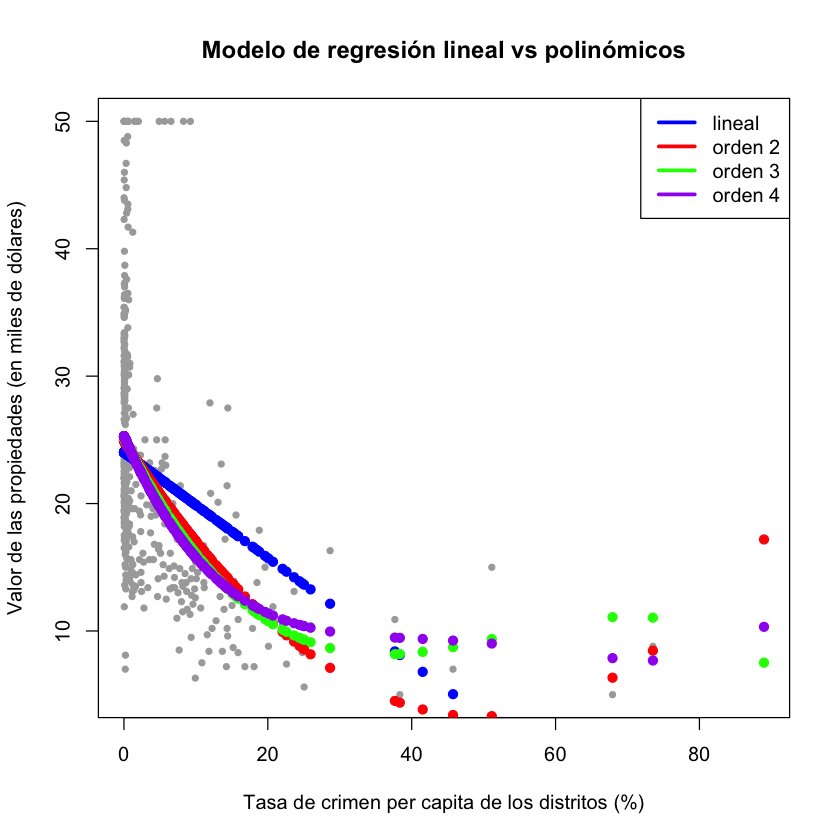

In [70]:
# Representación gráfica del modelo lineal vs no-lineales polinómicos
plot(x = wdata$crim, y = wdata$medv, pch = 20, col = "darkgrey", xlab= "Tasa de crimen per capita de los distritos (%)", 
     ylab="Valor de las propiedades (en miles de dólares)"); title("Modelo de regresión lineal vs polinómicos")
points(wdata$crim, fitted(mod_lineal), col = 'blue', pch = 20, cex=1.5)
points(wdata$crim, fitted(mod_poly2), col = 'red', pch = 20, cex=1.5)
points(wdata$crim, fitted(mod_poly3), col = 'green', pch = 20, cex=1.5)
points(wdata$crim, fitted(mod_poly4), col = 'purple', pch = 20, cex=1.5)
legend("topright", legend = c("lineal", "orden 2", "orden 3", "orden 4"),lwd = 3, col = c("blue","red", "green","purple"))

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Tener en cuenta que la regresión polinómica explicada anteriormente persigue generar una única función global que describa el comportamiento de la variable dependiente `medv` a partir de la variable independiente `crim` elevada a un polinomio de orden $k$. Ahora, la estrategia del método step functions consiste en dividir el rango de valores de la variable independiente `crim` en varios subintervalos y ajustar un coeficiente de regresión lineal distinto para cada uno ellos. En este caso, se pretende crear un modelo formado por $3-4$ step functions considerando diferentes intervalos de tasas de crimen y compararlo con el modelo de regresión lineal para ello seguiremos dos estrategias:

+ Escenario no. $1$: los puntos de corte en la variable independiente NO están equidistribuidos

+ Escenario no. $2$: los puntos de corte en la variable independiente SI están equidistribuidos

In [71]:
# Estimamos el modelo de regresión step functions con puntos de corte sin concretar (Escenario 1)
modelo_step_fun1 = lm(medv ~ cut(crim, 3), data = wdata)
summary(modelo_step_fun1)


Call:
lm(formula = medv ~ cut(crim, 3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.153  -5.353  -1.353   2.247  27.247 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              22.7530     0.4055  56.113  < 2e-16 ***
cut(crim, 3)(29.7,59.3] -13.4730     4.0670  -3.313  0.00099 ***
cut(crim, 3)(59.3,89.1] -14.6863     5.2400  -2.803  0.00526 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.049 on 503 degrees of freedom
Multiple R-squared:  0.03582,	Adjusted R-squared:  0.03199 
F-statistic: 9.344 on 2 and 503 DF,  p-value: 0.0001037


In [72]:
# Para visualizar los 3 intervalos definidos automáticamente
modelo_step_fun1$model$`cut(crim, 3)`

[1] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
  [6] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [11] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [16] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [21] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [26] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [31] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [36] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [41] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [46] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [51] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [56] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [61] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [66] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [71] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [76] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [81] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [86] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [91] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
 [96] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[101] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[106] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[111] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[116] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[121] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[126] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[131] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[136] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[141] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[146] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[151] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[156] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[161] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[166] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[171] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[176] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[181] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[186] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[191] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[196] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[201] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[206] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[211] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[216] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[221] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[226] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[231] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[236] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[241] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7] (-0.0826,29.7]
[246] (-0.0826,29.7] (-0.0826,29.

No podemos dejar que el algoritmo considere puntos de corte al azar ya que nos está proporcionando un valor que está fuera del rango de la variable independiente ya que el `min(wdata$crim)` es igual a $0.00632$ y nos está reportando un intervalo inferior igual a $(-0.0826,29.7]$. Esto ocurre a veces. Es un fallo de esta función y tenéis que comprobar siempre que los intervalos proporcionados estén dentro del rango de valores que toma la variable en cuestión. En estos casos, seleccionaremos nosotros los valores que ha elegido el algoritmo anterior pero seleccionando el valor mínimo del intervalo, cumpliéndose la condición de que no exista equidistribución entre los diferentes grupos.

In [73]:
# Estimamos el modelo de regresión step functions con puntos de corte sin eqidistribución (Escenario 1)
modelo_step_fun1 = lm(medv ~ cut(crim, c(min(wdata$crim),29.7,59.3,89.1)), data = wdata)
summary(modelo_step_fun1)


Call:
lm(formula = medv ~ cut(crim, c(min(wdata$crim), 29.7, 59.3, 
    89.1)), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.151  -5.351  -1.351   2.249  27.250 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                                 22.7505     0.4063
cut(crim, c(min(wdata$crim), 29.7, 59.3, 89.1))(29.7,59.3] -13.4705     4.0710
cut(crim, c(min(wdata$crim), 29.7, 59.3, 89.1))(59.3,89.1] -14.6838     5.2452
                                                           t value Pr(>|t|)    
(Intercept)                                                 55.996  < 2e-16 ***
cut(crim, c(min(wdata$crim), 29.7, 59.3, 89.1))(29.7,59.3]  -3.309  0.00100 ** 
cut(crim, c(min(wdata$crim), 29.7, 59.3, 89.1))(59.3,89.1]  -2.799  0.00532 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.058 on 502 degrees of freedom
  (1 observation deleted due to mis

Ahora vamos a estimar el modelo de step functions del Escenario no. $2$ en el que nosotros elegimos los puntos de corte. Como sabemos, existen dos criterios para seleccionar los valores de los knots serían, por un lado, a partir del histograma podemos hacer nosotros los intervalos en función de la frecuencia observada y por otro, a través de las medidas de posición cuartiles para tener intervalos equidistribuidos (seguiremos este criterio). 

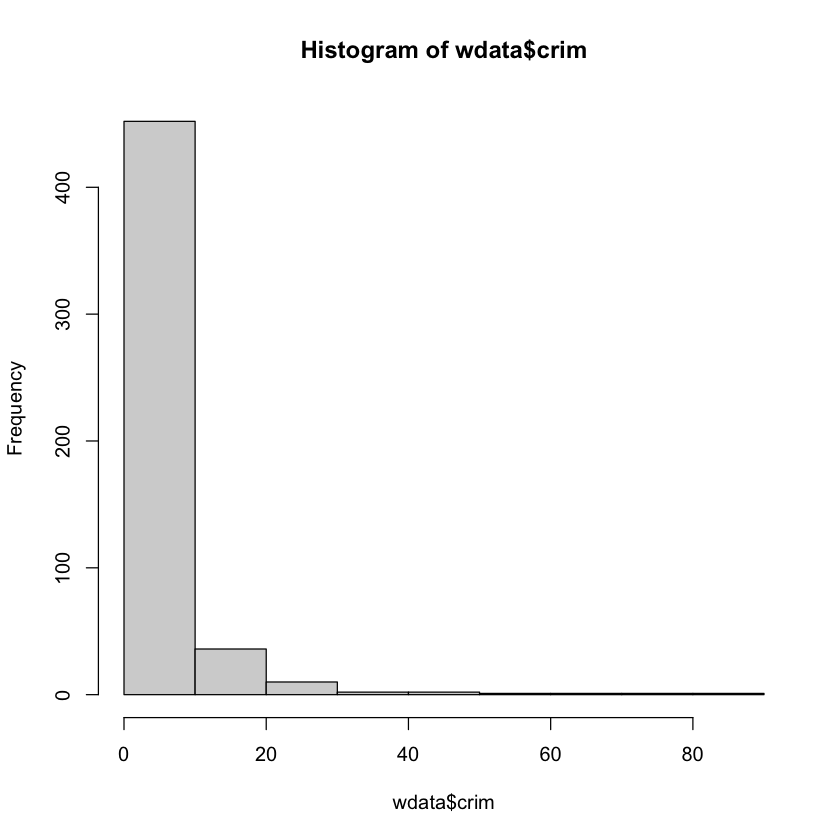

In [74]:
# Obtenemos el histograma de la variable independiente (aquí no sabemos los % equidistribuidos)
hist(wdata$crim) # vemos como prácticamente están concentrado en pocos valores

In [75]:
# Obtenemos Q1, Q2 y Q3 de la variable independiente
quantile(wdata$crim, c(.25,.5,.75))

25%      50%      75% 
0.082045 0.256510 3.677083

In [76]:
# Estimamos el modelo de regresión step functions con puntos de corte = cuartiles (Escenario 2)
modelo_step_fun2 = lm(medv ~ cut(crim, c(min(wdata$crim),0.08,0.25,3.67,max(wdata$crim))), data = wdata)
summary(modelo_step_fun2)


Call:
lm(formula = medv ~ cut(crim, c(min(wdata$crim), 0.08, 0.25, 
    3.67, max(wdata$crim))), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.775  -5.175  -1.999   2.901  33.801 

Coefficients:
                                                                            Estimate
(Intercept)                                                                  27.3618
cut(crim, c(min(wdata$crim), 0.08, 0.25, 3.67, max(wdata$crim)))(0.08,0.25]  -4.5872
cut(crim, c(min(wdata$crim), 0.08, 0.25, 3.67, max(wdata$crim)))(0.25,3.67]  -3.3852
cut(crim, c(min(wdata$crim), 0.08, 0.25, 3.67, max(wdata$crim)))(3.67,89]   -11.1626
                                                                            Std. Error
(Intercept)                                                                     0.7476
cut(crim, c(min(wdata$crim), 0.08, 0.25, 3.67, max(wdata$crim)))(0.08,0.25]     1.0509
cut(crim, c(min(wdata$crim), 0.08, 0.25, 3.67, max(wdata$crim)))(0.25,3.67]     1.0468
cut(cr

### Ejercicio 4

Utilizando la base de datos `Boston` de la librería $\tt MASS$ contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por $13$ variables que indican las características de la misma. Considerando la variable dependiente `medv` en función de la variable independiente `crim`, responder a las siguientes cuestiones:

1. Comparar gráficamente los modelos de regresión step functions estimados anteriormente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
2. Estimar dos o tres modelos de regresión splines polinómicos utilizando diferentes grados y puntos de corte e interpretar sus resultados. 
3. Compararlos gráficamente con el modelo de regresión lineal simple y calcular las métricas de bondad de ajuste para todos.
4. Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores teniendo en cuenta también el modelo de regresión lineal simple.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este caso, solo mostraré los resultados para que podáis verificar si lo habéis realizado correctamente o no. Podéis utilizar como referencia para comentar cada uno de los puntos las interpretaciones incluidas en el problema no. $2$. Al utilizar otra base de datos y diferentes variables, los resultados y por tanto, las interpretaciones, serán diferentes pero la estructura del ejercicio es la misma (paso a paso). </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [77]:
# Calculamos los 3 criterios de selección de los modelos estimados antes
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(modelo_step_fun1)$adj.r.squared, 
           summary(modelo_step_fun2)$adj.r.squared)

In [78]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(modelo_step_fun1)[2], extractAIC(modelo_step_fun2)[2])

In [79]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(modelo_step_fun1,k=log(nrow(wdata)))[2],
      extractAIC(modelo_step_fun2,k=log(nrow(wdata)))[2])

In [80]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","modelo_step_fun1","modelo_step_fun2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|                 | Coef.R2adj|      AIC|      BIC|
|:----------------|----------:|--------:|--------:|
|mod_lineal       |  0.1490955| 2165.815| 2174.268|
|modelo_step_fun1 |  0.0319674| 2228.637| 2241.317|
|modelo_step_fun2 |  0.1889501| 2140.277| 2157.183|

In [81]:
# Interpolación de puntos dentro del rango de la variable independiente (modelo_step_fun1 y 2)
limites = range(wdata$crim)
nuevos_puntos = seq(from = limites[1], to = limites[2], by = 1)
nuevos_puntos = data.frame(crim = nuevos_puntos)
nuevos_ajustes1 = predict(modelo_step_fun1, newdata = nuevos_puntos, se.fit = TRUE, level = 0.95)
nuevos_ajustes2 = predict(modelo_step_fun2, newdata = nuevos_puntos, se.fit = TRUE, level = 0.95)

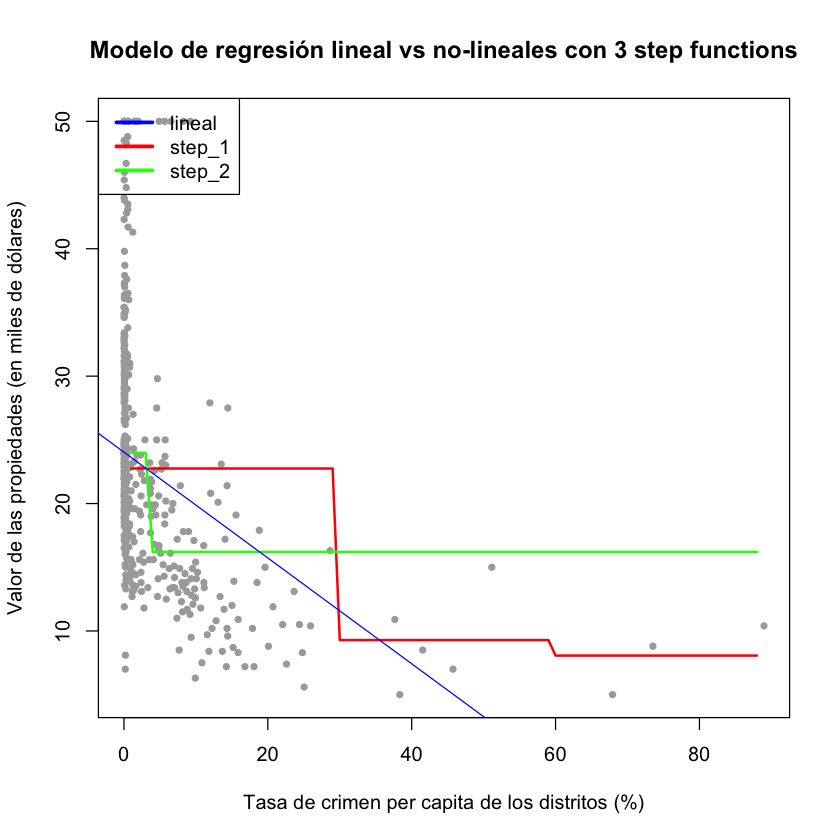

In [82]:
# Representación gráfica del modelo lineal vs modelos step functions
plot(x = wdata$crim, y = wdata$medv, pch = 20, col = "darkgrey", xlab= "Tasa de crimen per capita de los distritos (%)", 
     ylab="Valor de las propiedades (en miles de dólares)"); title("Modelo de regresión lineal vs no-lineales con 3 step functions")
lines(x = nuevos_puntos$crim, nuevos_ajustes1$fit, col = "red", lwd = 2)
lines(x = nuevos_puntos$crim, nuevos_ajustes2$fit, col = "green", lwd = 2)
abline(mod_lineal,col="blue")
legend("topleft", legend = c("lineal", "step_1", "step_2"),lwd = 3, col = c("blue","red", "green"))

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

En este apartado nos piden estimar los modelos splines polinómicos que, como sabemos, se tratan de una combinación directa de la regresión polinómica y de step functions. En lugar de ajustar un polinomio de grado alto a todo el rango de la variable independiente `crim`, como hemos hecho en el apartado no. $1$, este se divide en subintervalos y en cada uno de ellos se ajusta un polinomio de menor grado como veremos a continuación. Para ello, vamos a considerar las mismas dos estrategias que antes pero utilizando un polinomio cúbico:

+ Escenario no. $1$: los puntos de corte en la variable independiente NO están equidistribuidos

+ Escenario no. $2$: los puntos de corte en la variable independiente SI están equidistribuidos

In [83]:
# Cargamos la librería splines
require(splines) 

In [84]:
# Estimamos el modelo de regresión spline polinómico con 3 knots NO equidistribuidos (Escenario 1)
# Utilizamos los mismos puntos de corte que en el apartado anterior para el primer caso
mod_spline1 = lm(medv ~ bs(crim, knots=c(min(wdata$crim),29.7,59.3,89.1), degree=3), data = wdata)
summary(mod_spline1)


Call:
lm(formula = medv ~ bs(crim, knots = c(min(wdata$crim), 29.7, 
    59.3, 89.1), degree = 3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.047  -4.929  -1.996   2.747  33.705 

Coefficients: (2 not defined because of singularities)
                                                                    Estimate
(Intercept)                                                          10.5144
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)1  14.7558
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)2   2.2133
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)3  -2.3149
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)4   0.6125
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)5  -5.9088
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)6       NA
bs(crim, knots = c(min(wdata$crim), 29.7, 59.3, 89.1), degree = 3)7       NA
                                           

In [85]:
# bs(x, df=6, knots=sin determinar, degree=3) --> 3 = 6 - 3 

# El no. de knots = 3 (sin determinarlos nosotros pero equidistribuidos)
# Los grados de libertad = 6 (parámetros estimados)
# Los grados del polinomio son degree = 3 (polinomio cúbico)

In [86]:
# Estimamos el modelo de regresión spline polinómico con 3 knots equidistribuidos (Escenario 2)
mod_spline2 = lm(medv ~ bs(crim, df=6, degree=3), data = wdata)
summary(mod_spline2)


Call:
lm(formula = medv ~ bs(crim, df = 6, degree = 3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.385  -4.746  -1.991   2.150  33.279 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     32.657      2.546  12.825  < 2e-16 ***
bs(crim, df = 6, degree = 3)1   -6.164      3.422  -1.801 0.072264 .  
bs(crim, df = 6, degree = 3)2   -9.410      2.539  -3.706 0.000235 ***
bs(crim, df = 6, degree = 3)3   -9.025      2.864  -3.151 0.001727 ** 
bs(crim, df = 6, degree = 3)4  -39.110      5.964  -6.558 1.36e-10 ***
bs(crim, df = 6, degree = 3)5  -14.113     11.938  -1.182 0.237719    
bs(crim, df = 6, degree = 3)6  -24.762      7.839  -3.159 0.001681 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.024 on 499 degrees of freedom
Multiple R-squared:  0.2479,	Adjusted R-squared:  0.2388 
F-statistic: 27.41 on 6 and 499 DF,  p-value: < 2.2e-16


In [87]:
# Obtenemos los puntos de corte elegidos según criterio equitativo
attr(bs(wdata$crim, df = 6, degree = 3), "knots")

25%      50%      75% 
0.082045 0.256510 3.677083

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [88]:
# Calculamos los 3 criterios de selección de los modelos estimados antes
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_spline1)$adj.r.squared, 
           summary(mod_spline2)$adj.r.squared)

In [89]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_spline1)[2], extractAIC(mod_spline2)[2])

In [90]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2],extractAIC(mod_spline1,k=log(nrow(wdata)))[2],
      extractAIC(mod_spline2,k=log(nrow(wdata)))[2])

In [91]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_spline1","mod_spline2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|            | Coef.R2adj|      AIC|      BIC|
|:-----------|----------:|--------:|--------:|
|mod_lineal  |  0.1490955| 2165.815| 2174.268|
|mod_spline1 |  0.2113036| 2131.368| 2156.728|
|mod_spline2 |  0.2388280| 2114.381| 2143.967|

In [92]:
# Interpolación dentro del rango de valores variable independiente (mod_splines 1 y 2)
limites = range(wdata$crim)
nuevos_puntos = seq(from = limites[1], to = limites[2], by = 1)
nuevos_puntos = data.frame(crim = nuevos_puntos)
nuevos_ajustes1 = predict(mod_spline1, newdata = nuevos_puntos, se.fit = TRUE,level = 0.95)
nuevos_ajustes2 = predict(mod_spline2, newdata = nuevos_puntos, se.fit = TRUE,level = 0.95)

Warning message in predict.lm(mod_spline1, newdata = nuevos_puntos, se.fit = TRUE, :
“prediction from a rank-deficient fit may be misleading”


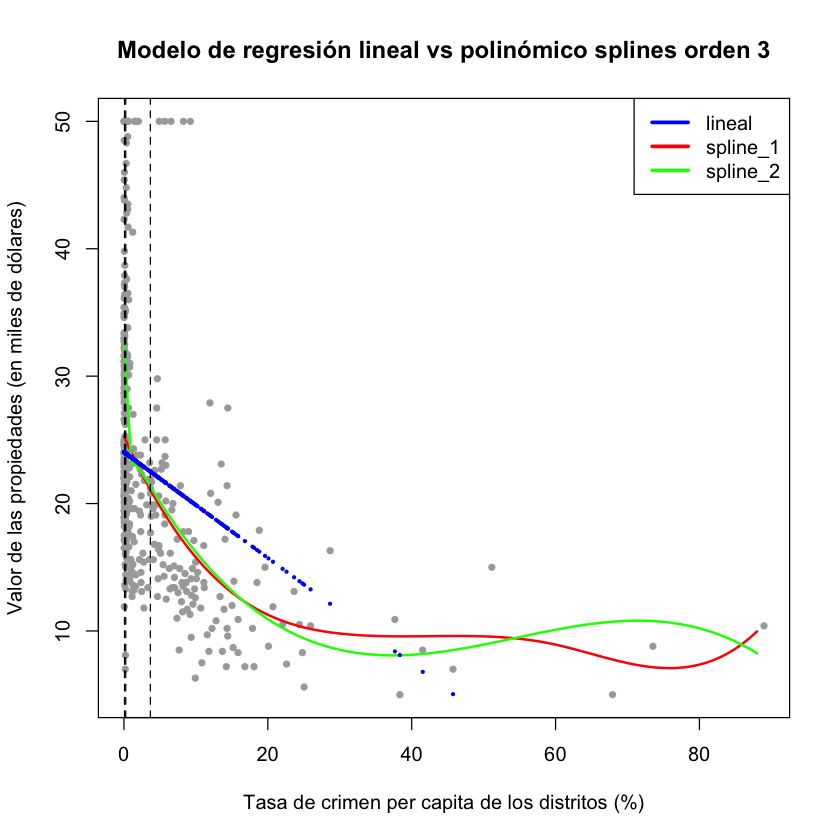

In [93]:
# Representación gráfica del modelo polinómico vs modelos splines polinómicos
plot(x = wdata$crim, y = wdata$medv, pch = 20, col = "darkgrey",xlab= "Tasa de crimen per capita de los distritos (%)", 
     ylab="Valor de las propiedades (en miles de dólares)")
title("Modelo de regresión lineal vs polinómico splines orden 3")
lines(x = nuevos_puntos$crim, nuevos_ajustes1$fit, col = "red", lwd = 2)
lines(x = nuevos_puntos$crim, nuevos_ajustes2$fit, col = "green", lwd = 2)
abline(v=c(0.08,0.25,3.67), lty = 2)
points(wdata$crim, fitted(mod_lineal), col = 'blue', pch = 20, cex=.5)
legend("topright", legend = c("lineal", "spline_1", "spline_2"),lwd = 3, col = c("blue","red", "green"))

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Por último, vamos a comparar las métricas de todos los modelos estimados en los apartados anteriores para ver con cuál de ellos obtenemos un mejor ajuste a la hora de querer explicar el valor de las propiedades a partir de la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas. Los modelos considerados en este ejercicio son los siguientes:

* `mod_lineal`: modelo de regresión lineal
* `mod_poly2`: modelo de regresión no-lineal polinómico orden 2 (cuadrático)
* `mod_poly3`: modelo de regresión no-lineal polinómico orden 3 (cúbico)
* `mod_poly4`: modelo de regresión no-lineal polinómico orden 4 (a la cuarta)
* `mod_step1`: modelo de regresión no-lineal step function no equidistribuido
* `mod_step2`: modelo de regresión no-lineal step function equidistribuido
* `mod_spline1`: modelo de regresión no-lineal spline polinómico orden 3 (no equidistribuido)
* `mod_spline2`: modelo de regresión no-lineal spline polinómico orden 3 (equidistribuido)

In [94]:
# Calculamos los 3 criterios de selección de los modelos estimados previamente
# Coeficiente de determinación ajustado
R2_mejor=c(summary(mod_lineal)$adj.r.squared, summary(mod_poly2)$adj.r.squared, summary(mod_poly3)$adj.r.squared, 
           summary(mod_poly4)$adj.r.squared, summary(modelo_step_fun1)$adj.r.squared, summary(modelo_step_fun2)$adj.r.squared, 
           summary(mod_spline1)$adj.r.squared,summary(mod_spline2)$adj.r.squared)

In [95]:
# Criterio de Información de Akaike
AIC_mejor=c(extractAIC(mod_lineal)[2], extractAIC(mod_poly2)[2], extractAIC(mod_poly3)[2], extractAIC(mod_poly4)[2],
            extractAIC(modelo_step_fun1)[2], extractAIC(modelo_step_fun2)[2], extractAIC(mod_spline1)[2], 
            extractAIC(mod_spline2)[2])

In [96]:
# Criterio de Información Bayesiano
BIC_mejor=c(extractAIC(mod_lineal,k=log(nrow(wdata)))[2], extractAIC(mod_poly2,k=log(nrow(wdata)))[2],
            extractAIC(mod_poly3,k=log(nrow(wdata)))[2], extractAIC(mod_poly4,k=log(nrow(wdata)))[2],
            extractAIC(modelo_step_fun1,k=log(nrow(wdata)))[2], extractAIC(modelo_step_fun2,k=log(nrow(wdata)))[2], 
            extractAIC(mod_spline1,k=log(nrow(wdata)))[2], extractAIC(mod_spline2,k=log(nrow(wdata)))[2])

In [97]:
# Obtenemos la tabla de comparación
Medidas_mejor = data.frame(R2_mejor,AIC_mejor,BIC_mejor,row.names=c("mod_lineal","mod_poly2","mod_poly3","mod_poly4",
                                                                    "modelo_step_fun1","modelo_step_fun2",
                                                                    "mod_spline1","mod_spline2"))
names(Medidas_mejor) = c("Coef.R2adj","AIC","BIC")
knitr::kable(Medidas_mejor)



|                 | Coef.R2adj|      AIC|      BIC|
|:----------------|----------:|--------:|--------:|
|mod_lineal       |  0.1490955| 2165.815| 2174.268|
|mod_poly2        |  0.2067315| 2131.320| 2144.000|
|mod_poly3        |  0.2130298| 2128.280| 2145.186|
|mod_poly4        |  0.2128543| 2129.383| 2150.516|
|modelo_step_fun1 |  0.0319674| 2228.637| 2241.317|
|modelo_step_fun2 |  0.1889501| 2140.277| 2157.183|
|mod_spline1      |  0.2113036| 2131.368| 2156.728|
|mod_spline2      |  0.2388280| 2114.381| 2143.967|

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Os dejo a ustedes que realicéis las tareas de diagnosis del mejor modelo siguiendo las indicaciones del problema no. $2$ y las sesiones teóricas. </b></div>

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>